<h1><center>Laboratorio 10: Adivina, Adivinador 🔮</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos - Otoño 2025</strong></center>

### Cuerpo Docente:

- Profesores: Stefano Schiappacasse, Sebastián Tinoco
- Auxiliares: Melanie Peña, Valentina Rojas
- Ayudantes: Angelo Muñoz, Valentina Zúñiga

### **Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados**

- Nombre de alumno 1: FLORENCIA VARGAS
- Nombre de alumno 2:MARIO ROMERO

### **Link de repositorio de GitHub:** [Insertar Repositorio](https://github.com/...../)

## Temas a tratar
- Series de Tiempo.
- Predicciones vía `Prophet`.
- Implementar un sistema de recomendación utilizando `surprise`.

## Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 6 días de plazo con descuento de 1 punto por día. Entregas Martes a las 23:59.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria, pero se recomienda fuertemente asistir.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquier material del curso que estimen conveniente.

### Objetivos principales del laboratorio
- Comprender qué es una serie de tiempo y su estructura.
- Identificar tendencias, estacionalidades e irregularidades.
- Armar un modelo predictivo para la serie.
- Conocer y aplicar sistemas de recomendación.
- Entender estructura y conocer casos de estudio.


In [1]:
# Usa %pip para que se aplique al kernel actual
%pip install numpy==1.22.4 cython
%pip install scikit-surprise==1.1.1.1


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 64.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/base_command.py", line 179, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/cli/req_command.py", line 67, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/commands/install.py", line 423, in run
    _, build_failures = build(
                        ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pip/_internal/wheel_builder.py", line 319, in build
    wheel_file = _build_one(
                 ^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-pa

In [2]:
# Si usted está utilizando Colabolatory le puede ser útil este código para cargar los archivos.
try:
    from google.colab import drive
    drive.mount("/content/drive")
    path = 'Dirección donde tiene los archivos en el Drive'
except:
    print('Ignorando conexión drive-colab')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Librerias globales

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import plotly.express as px

In [4]:
df_1 = pd.read_csv('/content/drive/MyDrive/cervezas.csv')
df_2 = pd.read_csv('/content/drive/MyDrive/datos_frink.csv')
df_3 = pd.read_csv('/content/drive/MyDrive/energia_homero.csv')

# **1. Forecasting (30 puntos)**


## **Prophet**

Prophet es una herramienta open-source de Facebook utilizada para realizar predicciones en series de tiempo. Esta se basa en la descomposición aditiva, donde tendencias no lineales se ajustan junto a la estacionalidad.

En la ecuación de a continuación se puede ver una idea general de los elementos que construyen a un modelo aditivo como lo es Prophet.

\begin{equation}
y(t) = g(t) + s(t) + h(t) + e(t)
\end{equation}

Donde, $g(t)$ hace referencia a las tendencias, que corresponden a cambios graduales en largos periodos de tiempo. $s(t)$ corresponde a la estacionalidad, son cambios periodicos o cortos en el tiempo. $h(t)$ es el efecto que tienen las festividades sobre las predicciones, mientras que e(t) corresponde al error o ruido. Finalmente $y(t)$, es la predicción hecha por el modelo.

Prophet trabaja por defecto con Piece-Wise Lineal Model, este es un modelo de regresión lineal, en el cual se buscan distintas zonas en que la data presente patrones o tendencias lineales, de estas zonas obtiene su regresión y luego las "une" de manera de representar toda la región, como se puede ver en la ecuación siguiente.

\begin{equation}
y(x)=
    \begin{cases}
        η_1 + \beta_1(x-b_1), & b_1 < x  \leqslant b_2 \\
        η_2 + \beta_2(x-b_2), & b_2 < x  \leqslant b_3 \\
        η_3 + \beta_3(x-b_3), & b_3 < x  \leqslant b_3 \\
        ... \\
        η_k + \beta_{nb}(x-b_{nb-1}), & b_{n-1} < x  \leqslant b_{nb} \\
    \end{cases}
\end{equation}

Siendo $b_1$ el primer punto de quiebre en la serie y así hasta el punto $b_{nb}$ correspondiente al último punto de quiebre de la serie con una cantidad $nb$ de puntos.

Para mayor información de Prophet y como utilizarla, pueden ver su [documentación](https://facebook.github.io/prophet/docs/quick_start.html#python-api), donde hay pueden encontrar un pequeño tutorial de la librería.

## **La Factura de Homero**

<center>
<img src ="https://i.makeagif.com/media/7-30-2018/H_ZAY1.gif" width = 500 />

Homero Simpson ha trabajado en la Planta Nuclear de Springfield por más de 20 años como Inspector de Seguridad, pero recientemente el Sr. Burns le ha permitido trabajar desde casa. Aunque le encanta la flexibilidad que esto le otorga, también ha notado un aumento considerable en su consumo energético en el hogar. Con el uso constante de calefacción en invierno y aire acondicionado en verano, Homero está preocupado por cómo afectará esto a su presupuesto en los próximos meses, ya que planea pasar aún más tiempo en casa.

Afortunadamente, gracias a su puesto en la Planta de Energía Nuclear, Homero tiene acceso a los datos de consumo de energía de cada ciudadano en Springfield, por lo que accede a esta información y almacena el consumo de su hogar en un archivo llamado `energia_homero.csv`. Este archivo posee el consumo diario en el hogar de Homero Simpson desde el Junio del 2016 hasta Julio del 2020.

Con esta valiosa información, Homero espera poder predecir su consumo energético y tomar decisiones informadas para ajustar su presupuesto mensual.

Los datos son los siguientes:

* **date**: Fecha de medición.
* **Energy_kWh**: Consumo diario de energía eléctrica en el hogar de Homero (en kWh).

## 1.1 Series de Tiempo [0 puntos]

### Carga de los datos

En primer lugar, cargue los datos históricos del archivo `energia_homero.csv` al entorno de trabajo. Una vez cargados, asegúrense de transformar la columna `date` a formato `datetime`. Además, visualice el consumo de energía en la casa de Homero mediante la librería `plotly`.


**Respuesta**:

In [5]:
#Codigo Aqui
df_3 = pd.read_csv('/content/drive/MyDrive/energia_homero.csv')

df_3['date'] = pd.to_datetime(df_3['date'], format='%Y-%m-%d')

#Visualixacion
fig = px.line(
    df_3,
    x='date',
    y='Energy_kWh',
    title='Consumo diario de energía de Homero',
    labels={
        'date': 'Fecha',
        'Energy_kWh': 'Consumo (kWh)'
    }
)

fig.show()

## 1.2 Controlando la Serie de Tiempo [6 puntos]

<center>
<img src ="https://i.pinimg.com/originals/66/77/88/667788e0b1f08ff1e1cfce11d303b203.gif" width = 500 />

Luego de leer mucho, Homero cree que necesita descomponer la serie de tiempo para poder controlar estos componentes de forma efectiva y lograr que la serie tenga propiedades de una serie estacionaria.

Usted, como buen ciudadano de Springfield, decide ayudar a Homero, el cual le pide que realice lo siguientes pasos:

0. Cree un conjunto de entrenamiento y uno de prueba (a proyectar). Para ello, considere como entrenamiento la información **hasta** el `2020-02-29` y como conjunto de prueba **desde** el `2020-03-01`. [0 puntos]
1. Cree un `Pipeline` que permita obtener una representación de la tendencia de la serie de tiempo, mediante un modelo Lineal. Nombre al pipeline `Pipeline_trend`. [1 punto]
2. Entrene el modelo lineal y luego obtenga predicciones tanto para el conjunto de entrenamiento como para el de prueba (intervalo completo de tiempo). Luego grafique las predicciones y calcule el `Mean Absolute Error` (MAE), tanto para el conjunto de prueba como para el de entrenamiento. [1 punto]
3. Grafique el error (Valor real - Valor predicho) para todo el intervalo de tiempo y responda ¿Hay un comportamiento estacional en la serie? [1 punto]
4.  Cree un `Pipeline` que permita modelar la estacionalidad de la serie temporal mediante términos de Fourier y la represente a través de una Regresión Lineal de la variable objetivo. Nombre a este pipeline `Pipeline_seasonal`. Determine el valor de Periodos `P` y el número de terminos de Fourier `n`. [1 punto]
5. Entrene el nuevo modelo y obtenga predicciones en el intervalo completo de tiempo. Luego grafique y calcule el `MAE` en el conjunto de prueba y en el de entrenamiento. [1 punto]
6. Vuelva a graficar el error y comente los resultados. [1 punto]

**Respuesta**

In [6]:
#CODIGO AQUI
#0
df_3 = df_3.sort_values('date')

#Creacion de los conjuntos
fecha_corte = pd.to_datetime('2020-02-29')
train = df_3[df_3['date'] <= fecha_corte].copy()
test  = df_3[df_3['date'] > fecha_corte].copy()

#Ver aprox cuantos datos tiene cada conjunto para posibles analisis futuros
print(f"Registros de entrenamiento: {train.shape[0]}")
print(f"Registros de prueba       : {test.shape[0]}")

Registros de entrenamiento: 1369
Registros de prueba       : 129


In [7]:
#1
#Pipelime

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression


Pipeline_trend = Pipeline([
    ('fecha_enteros', FunctionTransformer(
        lambda df_3: df_3['date'].map(pd.Timestamp.toordinal).to_numpy().reshape(-1, 1),
        validate=False
    )),
    ('regresion_lineal', LinearRegression())
])

#Para el pipeline pasamos la fecha a numero entero para la regresion lineal

In [8]:
#2
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go

X_train = train[['date']]
y_train = train['Energy_kWh']
X_test  = test[['date']]
y_test  = test['Energy_kWh']

Pipeline_trend.fit(X_train, y_train)
train_preds = Pipeline_trend.predict(X_train)
test_preds  = Pipeline_trend.predict(X_test)

train['trend'] = train_preds
test ['trend'] = test_preds

print("train_preds:", train_preds[:10])
print("test_preds :", test_preds[:10])


train_preds: [26.12094637 26.1140752  26.10720402 26.10033285 26.09346167 26.0865905
 26.07971932 26.07284815 26.06597698 26.0591058 ]
test_preds : [16.71430851 16.70743733 16.70056616 16.69369498 16.68682381 16.67995263
 16.67308146 16.66621029 16.65933911 16.65246794]


In [9]:
#2, Gráfico
fig = go.Figure()

#Entrenamiento
fig.add_trace(go.Scatter(
    x=train['date'], y=y_train,
    mode='lines', name='Real (Train)'
))
fig.add_trace(go.Scatter(
    x=train['date'], y=train_preds,
    mode='lines', name='Tendencia (Train)'
))

#Prueba
fig.add_trace(go.Scatter(
    x=test['date'], y=y_test,
    mode='lines', name='Real (Test)'
))
fig.add_trace(go.Scatter(
    x=test['date'], y=test_preds,
    mode='lines', name='Tendencia (Test)'
))

fig.update_layout(
    title='Consumo real vs. línea de tendencia',
    xaxis_title='Fecha',
    yaxis_title='Consumo (kWh)',
    legend=dict(x=0.02, y=0.98)
)
fig.show()

In [10]:
#2, MAE
mae_train = mean_absolute_error(y_train, train_preds)
mae_test  = mean_absolute_error(y_test,  test_preds)

print(f"MAE entrenamiento: {mae_train:.3f} kWh")
print(f"MAE prueba      : {mae_test :.3f} kWh")

MAE entrenamiento: 10.568 kWh
MAE prueba      : 8.656 kWh


In [11]:
#3
train['error'] = train['Energy_kWh'] - train['trend']
test ['error'] = test ['Energy_kWh'] - test ['trend']

df_errors = pd.concat([
    train[['date','error']],
    test [['date','error']]
]).sort_values('date')

#Grafico
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df_errors['date'],
    y=df_errors['error'],
    mode='lines',
    name='Residual (Real − Predicho)'
))
fig.update_layout(
    title='Residual de consumo a lo largo del tiempo',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    margin=dict(l=40, r=40, t=60, b=40)
)
fig.show()


In [12]:
#3*** para corroborrar resultados

df_tabla = pd.concat([
    train[['date','Energy_kWh','trend','error']],
    test [['date','Energy_kWh','trend','error']]
]).sort_values('date')

print(df_tabla.head(10))


        date  Energy_kWh      trend      error
0 2016-06-01      29.691  26.120946   3.570054
1 2016-06-02      28.789  26.114075   2.674925
2 2016-06-03      19.247  26.107204  -6.860204
3 2016-06-04      22.883  26.100333  -3.217333
4 2016-06-05      25.195  26.093462  -0.898462
5 2016-06-06      29.323  26.086590   3.236410
6 2016-06-07      30.322  26.079719   4.242281
7 2016-06-08      40.051  26.072848  13.978152
8 2016-06-09      38.667  26.065977  12.601023
9 2016-06-10      42.467  26.059106  16.407894


se confirma que esán bien
Además, se puede ver claramente que si hay una componente estacional ya que se ven peaks positivos en julio y valles negativos en enero, repitiéndose año a año.

In [13]:
#4

from sklearn.base import BaseEstimator, TransformerMixin

#Transformer para "tener" Fourier
class FourierFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, period=365, n_terms=3):
        self.period  = period
        self.n_terms = n_terms

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        t = pd.to_datetime(X['date']).map(pd.Timestamp.toordinal).to_numpy()
        cols = []
        for k in range(1, self.n_terms+1):
            cols.append(np.sin(2 * np.pi * k * t / self.period))
            cols.append(np.cos(2 * np.pi * k * t / self.period))
        return np.vstack(cols).T

#Pipelina con period 365 para tener season de años y n 3 para evitar sobreajuste
Pipeline_seasonal = Pipeline([
    ('fourier', FourierFeatures(period=365, n_terms=3)),
    ('regresion_lineal', LinearRegression())
])



In [14]:
#5, entrenamiento
Pipeline_seasonal.fit(X_train, y_train)
full_preds = Pipeline_seasonal.predict(df_3[['date']])


#MAE
train_seas_pred = Pipeline_seasonal.predict(X_train)
test_seas_pred  = Pipeline_seasonal.predict(X_test)
mae_train_seas = mean_absolute_error(y_train, train_seas_pred)
mae_test_seas  = mean_absolute_error(y_test,  test_seas_pred)

print(f"MAE entrenamiento (estacional): {mae_train_seas:.3f} kWh")
print(f"MAE prueba       (estacional): {mae_test_seas :.3f} kWh")

MAE entrenamiento (estacional): 5.409 kWh
MAE prueba       (estacional): 4.263 kWh


In [15]:
#5, Grafic0
df_3['seasonal_full'] = full_preds
fig = go.Figure()

# Serie real
fig.add_trace(go.Scatter(
    x=df_3['date'], y=df_3['Energy_kWh'],
    mode='lines', name='Real'
))

# Predicción estacional
fig.add_trace(go.Scatter(
    x=df_3['date'], y=df_3['seasonal_full'],
    mode='lines', name='Predicción (Estacional)'
))

# para diferenciar entre los test y prediccion
fig.add_trace(go.Scatter(
    x=test['date'], y=test_seas_pred,
    mode='markers',
    marker=dict(size=6),
    name='Predicción (Test)'
))

fig.update_layout(
    title='Consumo real vs. componente estacional (Fourier)',
    xaxis_title='Fecha',
    yaxis_title='Consumo (kWh)',
    legend=dict(x=0.02, y=0.98)
)

fig.show()


In [16]:
#6
df_3['error_seas'] = df_3['Energy_kWh'] - df_3['seasonal_full']

#grafico
import plotly.graph_objects as go

fig = go.Figure([
    go.Scatter(
        x=df_3['date'],
        y=df_3['error_seas'],
        mode='lines',
        name='Residual Estacional'
    )
])
fig.update_layout(
    title='Error de Predicción Estacional (Real − Predicho)',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)',
    margin=dict(l=40, r=40, t=60, b=40)
)
fig.show()


In [17]:
#para corroborrar que los datos esten bien del grafico
train['seasonal_pred'] = train_seas_pred
train['error_seas']     = train['Energy_kWh'] - train['seasonal_pred']

test ['seasonal_pred']  = test_seas_pred
test ['error_seas']     = test ['Energy_kWh'] - test ['seasonal_pred']

df_tabla_seasonal = pd.concat([
    train[['date','Energy_kWh','seasonal_pred','error_seas']],
    test [['date','Energy_kWh','seasonal_pred','error_seas']]
]).sort_values('date')

print(df_tabla_seasonal.head(10))


        date  Energy_kWh  seasonal_pred  error_seas
0 2016-06-01      29.691      28.033252    1.657748
1 2016-06-02      28.789      28.310184    0.478816
2 2016-06-03      19.247      28.583524   -9.336524
3 2016-06-04      22.883      28.853136   -5.970136
4 2016-06-05      25.195      29.118892   -3.923892
5 2016-06-06      29.323      29.380671   -0.057671
6 2016-06-07      30.322      29.638361    0.683639
7 2016-06-08      40.051      29.891855   10.159145
8 2016-06-09      38.667      30.141054    8.525946
9 2016-06-10      42.467      30.385868   12.081132


El ajuste con Fourier reduce drásticamente la amplitud de los ciclos anuales en los errores, dejandolo basicamente sin peaks estacionales tan marcados y mas cercanosa cero.

## 1.3 Un Consejo para Homero [6 puntos]

<center>
<img src ="https://media.tenor.com/sjbvGMLZiDkAAAAM/the-simpsons-homner-simpson.gif" width = 400 />

Homero al observar los resultados obtenidos, se mostró conforme y decidió no seguir averiguando al respecto. Usted, como buen amigo y utilizando sus recientes conocimientos en Forecast, le sugiere a Homero utilizar **Prophet**, una herramienta de modelado de series de tiempo que incluye descomposición de tendencias y estacionalidad, así como la capacidad de incorporar regresores adicionales. Usted le explica a Homero que Prophet es especialmente útil para realizar pronósticos cuando hay patrones estacionales y que podría mejorar los resultados que ha obtenido hasta ahora.

Homero, algo agotado debido al exhaustivo estudio que hizo para entender como funciona esta herramienta, le solicita ayuda para implementar Prophet y evaluar si puede obtener mejores resultados en sus predicciones de consumo energético.

Dado esto, Homero le pide que realice los siguientes pasos:

1. Instale y cargue Prophet a su entorno de trabajo. Luego renombre la variable temporal `date` por `ds` y la variable objetivo `Energy_kWh` por `y`, en los conjuntos de entrenamiento y de prueba. [1 punto]
2. Cree y ajuste el modelo Prophet con sus datos de entrenamiento. Luego realice prepare el dataset de predicciones con su set de prueba y realice las predicciones. `Nota:` Le puede ser útil este [Enlace](https://facebook.github.io/prophet/docs/quick_start.html#python-api) [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en todo el intervalo de tiempo. Analice sus resultados y responda: ¿Hay un comportamiento estacional en la serie? [1 punto]

In [18]:
# librerias extras
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

**Respuesta:**

In [19]:
!pip install prophet

In [20]:
#CODIGO AQUI

#1
train_prophet = train.rename(columns={'date':'ds','Energy_kWh':'y'})[['ds','y']]
test_prophet  = test .rename(columns={'date':'ds','Energy_kWh':'y'})[['ds','y']]

#2
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)
model.fit(train_prophet)

future_test = test_prophet[['ds']].copy()
forecast_test = model.predict(future_test)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2iqwn7w/rt7j5coi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2iqwn7w/p9ggjhun.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21571', 'data', 'file=/tmp/tmp_2iqwn7w/rt7j5coi.json', 'init=/tmp/tmp_2iqwn7w/p9ggjhun.json', 'output', 'file=/tmp/tmp_2iqwn7w/prophet_modelbab6arjn/prophet_model-20250619034805.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:48:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:48:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 0.95, 'Componentes de Prophet')

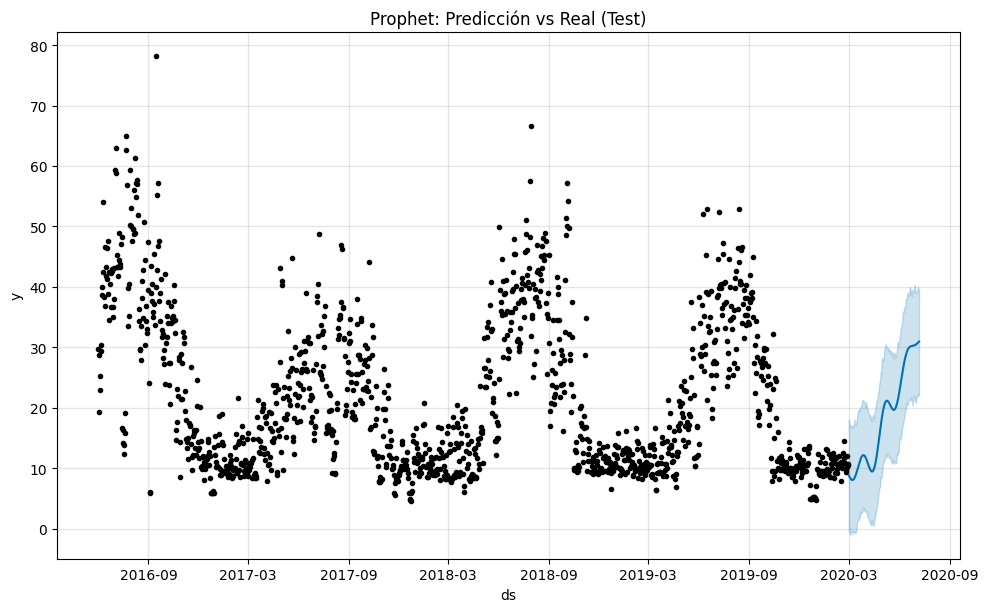

Error in callback <function flush_figures at 0x7b860916ac00> (for post_execute):


KeyboardInterrupt: 

In [21]:
#3 grafios

fig1 = model.plot(forecast_test.rename(columns={'y': 'y', 'ds':'ds'}).assign(y=test_prophet['y']))
fig1.gca().set_title("Prophet: Predicción vs Real (Test)")


future_full = pd.DataFrame({'ds': df_3['date']})
forecast_full = model.predict(future_full)
fig2 = model.plot_components(forecast_full)
fig2.suptitle("Componentes de Prophet", y=0.95)


In [22]:
#4

# Predicciones sobre train
forecast_train = model.predict(train_prophet[['ds']])
mae_train = mean_absolute_error(train_prophet['y'], forecast_train['yhat'])
mae_test  = mean_absolute_error(test_prophet ['y'], forecast_test ['yhat'])

print(f"MAE entrenamiento (Prophet): {mae_train:.3f} kWh")
print(f"MAE prueba (Prophet): {mae_test :.3f} kWh")


MAE entrenamiento (Prophet): 4.843 kWh
MAE prueba (Prophet): 4.712 kWh


In [23]:
#5
resid = pd.DataFrame({
    'date' : df_3['date'],
    'y'     : df_3['Energy_kWh'],
    'yhat'  : forecast_full['yhat']
})
resid['error'] = resid['y'] - resid['yhat']

# 5.2) Plotly para residuales
import plotly.graph_objects as go

fig3 = go.Figure([
    go.Scatter(
        x=resid['date'],
        y=resid['error'],
        mode='lines',
        name='Residual (Real−Predicho)'
    )
])
fig3.update_layout(
    title='Residuales de Prophet (todo el período)',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)'
)
fig3.show()


¿Hay un comportamiento estacional en la serie?

R: Los residuales oscilan de forma aleatoria, sin peaks periódicos claros en intervalos regulares, por lo que se puede inferir que Prophet ha capturado la estacionalidad anual, haciendo asi que no quede un comportamiento estacional significativo.

## 1.4 Incluyendo Regresores [5 puntos]

<center>
<img src ="https://i.redd.it/64hwjftunjjd1.gif" width = 400 />

Con los nuevos resultados obtenidos del modelo Prophet, usted le aconseja a Homero que puede mejorar sus predicciones al incluir regresores en el modelo, es decir, variables adicionales que pueden influir en la variable objetivo, en este caso, el consumo energético. Homero encuentra que es una buena idea y va en busca de ayuda donde el Profesor Frink, un destacado Científico de Springfield. Para suerte de Homero, Frink tenía un estudio reciente que registra las condiciones climáticas en Springfield, en el mismo intervalo de tiempo en que Homero disponía de los datos de consumo eléctrico. Con esta nueva información, usted le recomienda a Homero que podrían utilizar esta información meteorológica proporcionada como variables exógenas al modelo.

Sin embargo, al no comprender bien la importancia de los regresores, Homero decide confiar en sus capacidades y le pide que, por favor, incluya estas variables en el modelo para evaluar su impacto en las predicciones.

Para ello, usted debe:
0. Seleccionar las variables exógenas a utilizar del archivo `datos_frink.csv`. Añada estas variables a sus conjuntos de entrenamiento y prueba mediante `merge`. [0 puntos]
1. Cree el modelo Prophet e incluya los regresores (variables exógenas) al modelo. Luego realice el entrenamiento. **Hint**: Utilice el método `.add_regressor()`. Mas información en el siguiente [Enlace](https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors). [2 puntos]
2. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
3. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y de prueba. Analice sus resultados. [1 punto]
4. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]

Los datos del dataset de Frink son los siguientes:

* **date**: Fecha de medición.
* **Temp_max**: Temperatura máxima registrada durante el día (en °F).
* **Temp_avg**: Temperatura promedio registrada durante el día (en °F).
* **Temp_min**: Temperatura mínima registrada durante el día (en °F).
* **Dew_max**: Punto de rocío máximo registrado durante el día (en °F).
* **Dew_avg**: Punto de rocío promedio registrado durante el día (en °F).
* **Dew_min**: Punto de rocío mínimo registrado durante el día (en °F).
* **Hum_max**: Humedad máxima registrada durante el día (en porcentaje).
* **Hum_avg**: Humedad promedio registrada durante el día (en porcentaje).
* **Hum_min**: Humedad mínima registrada durante el día (en porcentaje).
* **Wind_max**: Velocidad máxima del viento registrada durante el día (en millas por hora, mph).
* **Wind_avg**: Velocidad promedio del viento registrada durante el día (en millas por hora, mph).
* **Wind_min**: Velocidad mínima del viento registrada durante el día (en millas por hora, mph).
* **Press_max**: Presión atmosférica máxima registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_avg**: Presión atmosférica promedio registrada durante el día (en pulgadas de mercurio, Hg).
* **Press_min**: Presión atmosférica mínima registrada durante el día (en pulgadas de mercurio, Hg).

**Respuesta:**

Para ver cuales variables dejar, veremos la correlación, esto porque tenemos promedios, min y max entonces probablemente sea mejor dejar el prom, pero para asegurarnos
No dejamos todas para evitar correlación entre las variables y multicolinealidad, y reducir dimensionalidad

           Temp_avg  Temp_min  Temp_max   Dew_avg   Dew_min   Dew_max  \
Temp_avg   1.000000  0.964856  0.970671  0.927545  0.902473  0.907404   
Temp_min   0.964856  1.000000  0.896819  0.937564  0.940381  0.899193   
Temp_max   0.970671  0.896819  1.000000  0.863508  0.834735  0.853261   
Dew_avg    0.927545  0.937564  0.863508  1.000000  0.968535  0.970852   
Dew_min    0.902473  0.940381  0.834735  0.968535  1.000000  0.904039   
Dew_max    0.907404  0.899193  0.853261  0.970852  0.904039  1.000000   
Hum_avg    0.105836  0.211626  0.009409  0.466556  0.437150  0.443943   
Hum_min    0.032589  0.165240 -0.115138  0.365303  0.363220  0.334323   
Hum_max    0.217103  0.221901  0.198014  0.470792  0.415608  0.489682   
Wind_avg  -0.142861 -0.071067 -0.233705 -0.094989 -0.126508 -0.050420   
Wind_min  -0.135562 -0.044836 -0.222661 -0.092529 -0.090757 -0.090190   
Wind_max   0.029039  0.060535 -0.017668  0.078595  0.026391  0.133957   
Press_avg -0.577216 -0.563582 -0.538695 -0.619705 -

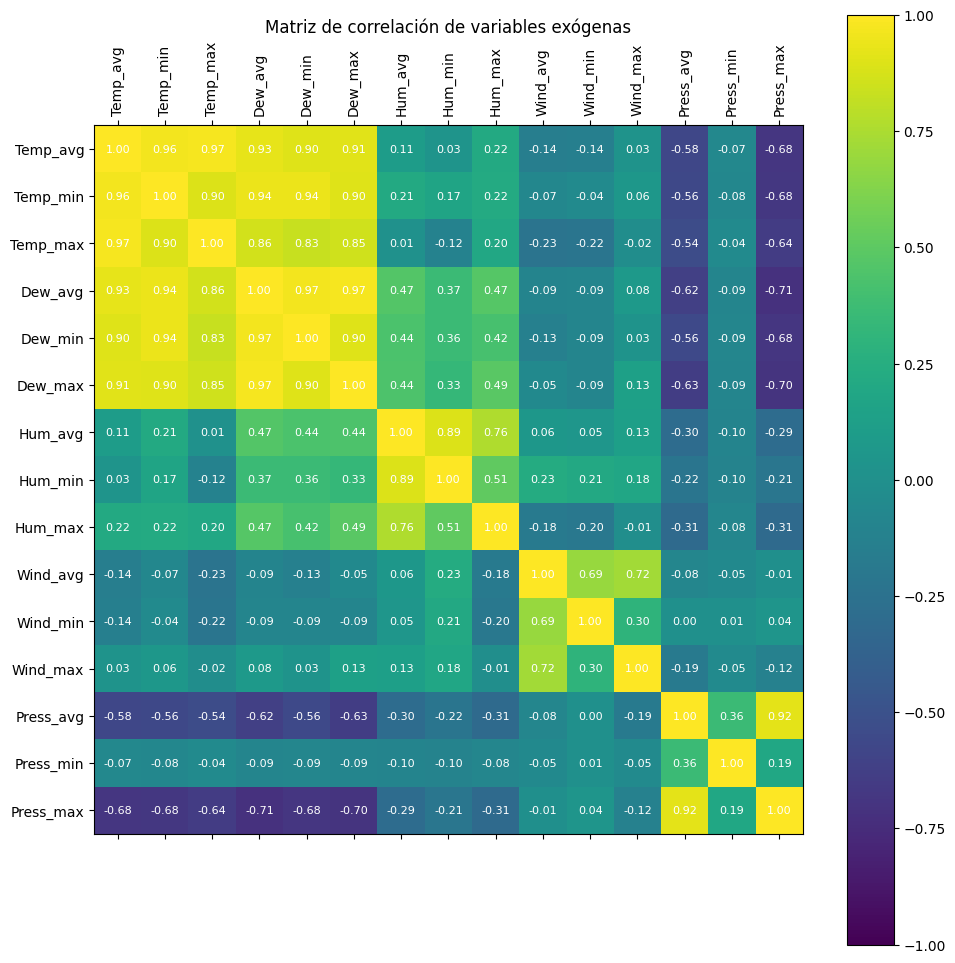

In [24]:
#CODIGO AQUI
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go

df_2['date'] = pd.to_datetime(df_2['date'])



vars_candidatas = [
    'Temp_avg','Temp_min','Temp_max',
    'Dew_avg', 'Dew_min','Dew_max',
    'Hum_avg','Hum_min','Hum_max',
    'Wind_avg', 'Wind_min','Wind_max',
    'Press_avg','Press_min', 'Press_max'
]

corr = df_2[vars_candidatas].corr()

print(corr)

fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(corr, vmin=-1, vmax=1, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(len(vars_candidatas)))
ax.set_yticks(range(len(vars_candidatas)))
ax.set_xticklabels(vars_candidatas, rotation=90)
ax.set_yticklabels(vars_candidatas)


for i in range(len(vars_candidatas)):
    for j in range(len(vars_candidatas)):
        val = corr.iloc[i, j]
        ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white', fontsize=8)

plt.title("Matriz de correlación de variables exógenas")
plt.tight_layout()
plt.show()


Se comprueba lo pensado, además vemos que DEW tambien se correlaciona muhco con TEMP, asi que dejaremos TEMP

In [25]:
#0
exog_vars = ['Temp_avg','Hum_avg','Wind_avg','Press_avg']

train = train.merge(df_2[['date'] + exog_vars], on='date', how='left')
test  = test .merge(df_2[['date'] + exog_vars], on='date', how='left')

#1
train_prop = train.rename(columns={'date':'ds','Energy_kWh':'y'})[['ds','y'] + exog_vars]
test_prop  = test .rename(columns={'date':'ds','Energy_kWh':'y'})[['ds','y'] + exog_vars]

model_exog = Prophet(yearly_seasonality=True)
for var in exog_vars:
    model_exog.add_regressor(var)
model_exog.fit(train_prop)


forecast_train = model_exog.predict(train_prop[['ds'] + exog_vars])
forecast_test  = model_exog.predict(test_prop [['ds'] + exog_vars])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2iqwn7w/xnifb8ep.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_2iqwn7w/nr7b8lho.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63399', 'data', 'file=/tmp/tmp_2iqwn7w/xnifb8ep.json', 'init=/tmp/tmp_2iqwn7w/nr7b8lho.json', 'output', 'file=/tmp/tmp_2iqwn7w/prophet_model_fcv26rf/prophet_model-20250619034810.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:48:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:48:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 0.95, 'Componentes de Prophet con Exógenas')

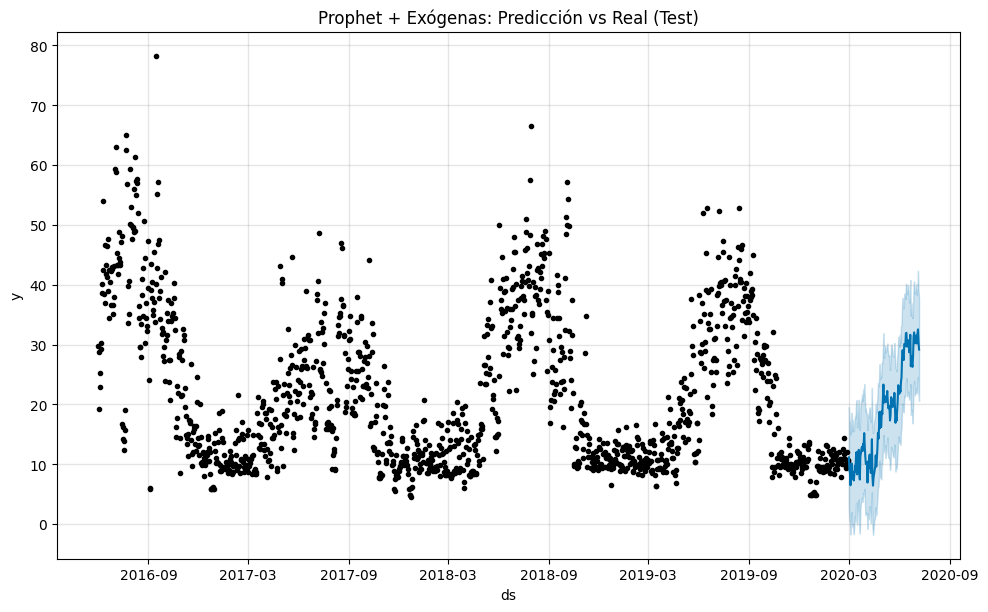

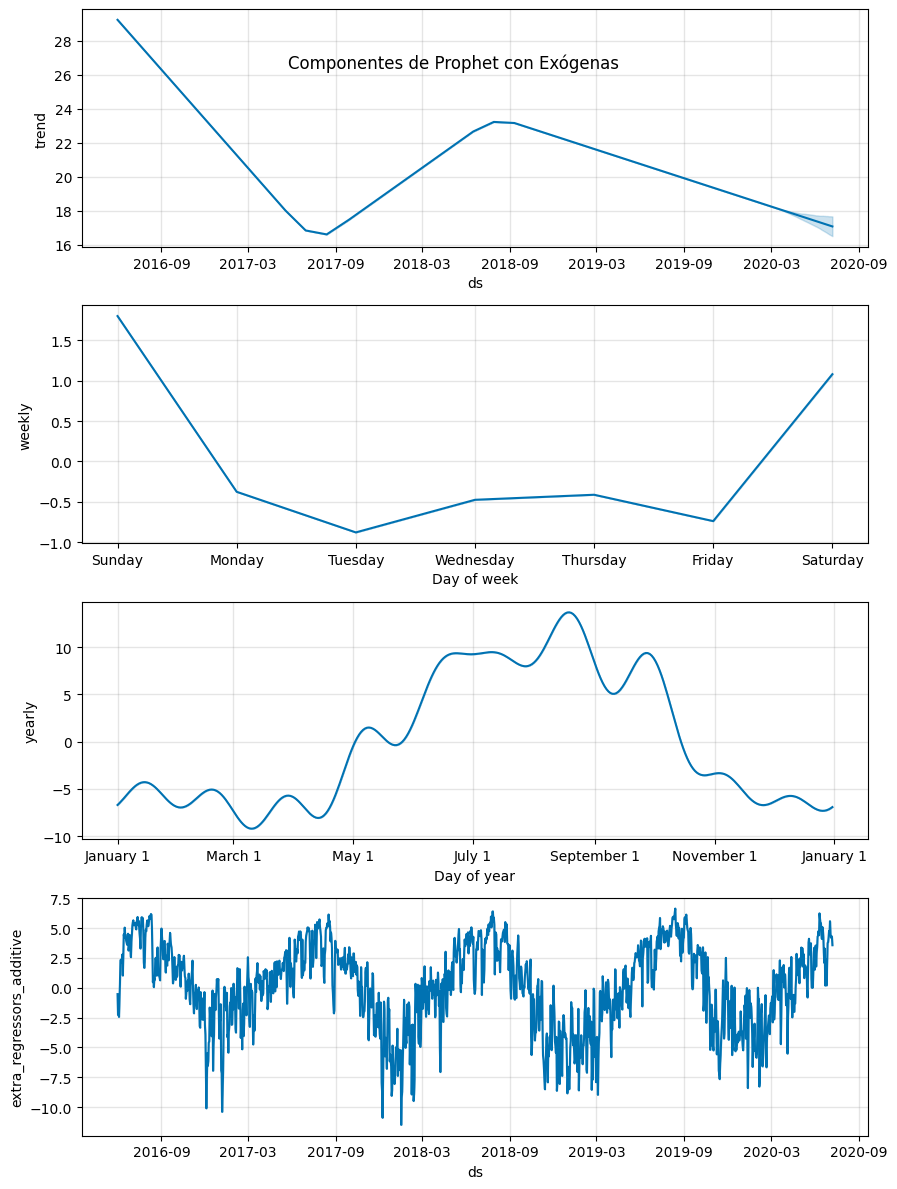

In [26]:
#2
fig1 = model_exog.plot(
    forecast_test.assign(y=test_prop['y'])
)
fig1.gca().set_title("Prophet + Exógenas: Predicción vs Real (Test)")

future_full = pd.DataFrame({'ds': df_3['date']})
future_full = future_full.merge(df_2[['date'] + exog_vars],
                                left_on='ds', right_on='date', how='left')
fig2 = model_exog.plot_components(model_exog.predict(future_full))
fig2.suptitle("Componentes de Prophet con Exógenas", y=0.95)

In [27]:
#3
mae_train_exog = mean_absolute_error(train_prop['y'], forecast_train['yhat'])
mae_test_exog  = mean_absolute_error(test_prop ['y'], forecast_test ['yhat'])
print(f"MAE Train (con exógenas): {mae_train_exog:.3f} kWh")
print(f"MAE Test (con exógenas): {mae_test_exog :.3f} kWh")

MAE Train (con exógenas): 4.744 kWh
MAE Test (con exógenas): 4.563 kWh


Al comparar el mae con exogenas con los otros maes obtenidos en las preguntas anteriores, vemos que este baja de 4.843 kWh a 4.744 kWh en entrenamiento, y en prueba de 4.712 kWh a 4.563 kWh, por lo que confirmamos que las variables meteorológicas si influyen, además de que mejoran la precisión del modelo sin incurrir en sobreajuste.

In [28]:
#4
resid_exog = pd.DataFrame({
    'date': df_3['date'],
    'real': df_3['Energy_kWh'],
    'pred': model_exog.predict(
               pd.DataFrame({'ds': df_3['date']})
               .merge(df_2[['date'] + exog_vars],
                      left_on='ds', right_on='date', how='left')
            )['yhat']
})
resid_exog['error'] = resid_exog['real'] - resid_exog['pred']

fig3 = go.Figure([
    go.Scatter(
        x=resid_exog['date'],
        y=resid_exog['error'],
        mode='lines',
        name='Residual (Real − Predicho)'
    )
])
fig3.update_layout(
    title='Residuales Prophet con Exógenas',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)'
)
fig3.show()


P: Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y de prueba. ¿Hay un comportamiento estacional en la serie? ¿Influyen estas variables en el comportamiento del consumo energético en el hogar de Homero? [1 punto]
R: En el gráfico se puede ver que no hay un oscilamentio estacionario claro, sino que es mas aleatorio, sin tener peaks muy marcados ni periódicos, por lo que Prophet con exógenas pudo captura la estacionalidad anual.
Además, al comparar el MAE con y sin regresores vemos que el error disminuye significativamente, lo que demuestra que las variables meteorológicas si influyen de forma significativa en el consumo energético de Homero.

## 1.5 Aplicando Lags [7 puntos]

<center>
<img src ="https://i.gifer.com/J45h.gif" width = 400 />

Homero, satisfecho con los resultados obtenidos, cree que aún puede mejorar el rendimiento del modelo incorporando lags de las variables exógenas. Se le ocurre que, al incluir estos lags, podría identificar cómo los valores pasados de las variables influyen en la evolución de la variable objetivo. Con esta idea en mente, Homero solicita su ayuda para encontrar y aplicar los lags adecuados a las variables exógenas de manera efectiva.

Para ello, a usted se le pide que:

1. Calcule la `Autocorrelación Parcial` de las variables exógenas `avg` que usted haya considerado. Por ejemplo: `Temp_avg, Dew_avg, etc`. Luego determine la cantidad de rezagos (lags) que se va a aplicar a cada una de las variables. Justifique. [1 punto]

2. Aplique los lags determinados en el paso anterior e incluyalos como variables en los conjuntos train y test. [1 punto]

3. Impute los valores nulos de los nuevos atributos lags mediante la media de cada variable. [1 punto]

4. Cree y entrene el modelo Prophet e incluya las variables exógenas y adicionalmente sus respectivos lags al modelo. [1 punto]

5. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
6. Calcule el `MAE` de la predicción en el conjunto de prueba y en el de entrenamiento. Analice sus resultados. [1 punto]
7. Grafique el error (Valor real - Valor predicho) en el conjunto de entrenamiento y en el de prueba. ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]


**Respuesta:**

In [29]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go

KeyboardInterrupt: 

In [ ]:
#1
nlags     = 20
N         = len(train)
threshold = 1.96 / np.sqrt(N)

selected_lags = {}
for var in exog_vars:
    pac_vals = pacf(train[var].dropna(), nlags=nlags)
    # Imprime los coeficientes de PACF para cada lag
    print(f"\nPACF de {var} (umbral ±{threshold:.3f}):")
    for k, val in enumerate(pac_vals):
        mark = "*" if k>0 and abs(val)>threshold else ""
        print(f"  lag {k:2d}: {val: .3f} {mark}")
    # Ahora filtra solo los lags significativos
    selected_lags[var] = [lag for lag, val in enumerate(pac_vals)
                          if lag>0 and abs(val)>threshold]

print("\nLags significativos por variable:", selected_lags)
# -> todos muestran solo lag 1 como significativo

Usaremos lag 1 ya que es el unico que supera de forma consistente el umbral de significancia en la PACF de cada variable (+- 0.053), indicando que la dependencia más fuerte es con el día anterior.

In [ ]:
#2
lags     = {var:1 for var in exog_vars}
lag_cols = [f"{v}_lag1" for v in exog_vars]

for var, lag in lags.items():
    train[f"{var}_lag{lag}"] = train[var].shift(lag)
    test [f"{var}_lag{lag}"] = test [var].shift(lag)

#3
for col in lag_cols:
    m = train[col].mean()
    train[col].fillna(m, inplace=True)
    test [col].fillna(m, inplace=True)

#4
train_prop = (
    train
    .rename(columns={'date':'ds','Energy_kWh':'y'})
    [['ds','y'] + exog_vars + lag_cols]
)
test_prop = (
    test
    .rename(columns={'date':'ds','Energy_kWh':'y'})
    [['ds','y'] + exog_vars + lag_cols]
)

model = Prophet(yearly_seasonality=True)
for reg in exog_vars + lag_cols:
    model.add_regressor(reg)
model.fit(train_prop)


In [ ]:
# 5
forecast_train = model.predict(train_prop)
forecast_test  = model.predict(test_prop)

#test
fig1 = model.plot(forecast_test.assign(y=test_prop['y']))
fig1.gca().set_title('Prophet + Exógenas y Lags: Real vs Predicción (Test)')

#componented
future_full = pd.DataFrame({'ds': df_3['date']})
future_full = future_full.merge(
    df_2[['date'] + exog_vars],
    left_on='ds', right_on='date', how='left'
)
for var,lag in lags.items():
    future_full[f"{var}_lag{lag}"] = future_full[var].shift(lag)
future_full[lag_cols] = future_full[lag_cols].fillna(train[lag_cols].mean())

forecast_full = model.predict(future_full)
fig2 = model.plot_components(forecast_full)


In [ ]:

# mae
mae_train = mean_absolute_error(train_prop['y'], forecast_train['yhat'])
mae_test  = mean_absolute_error(test_prop ['y'], forecast_test ['yhat'])
print(f"MAE Train (con lags): {mae_train:.3f} kWh")
print(f"MAE Test (con lags): {mae_test :.3f} kWh")


In [ ]:

#7
res_train = pd.DataFrame({
    'ds':    train_prop['ds'],
    'error': train_prop['y'] - forecast_train['yhat']
})
res_test = pd.DataFrame({
    'ds':    test_prop['ds'],
    'error': test_prop['y']   - forecast_test ['yhat']
})

fig3 = go.Figure([
    go.Scatter(x=res_train['ds'], y=res_train['error'],
               mode='lines', name='Error Train'),
    go.Scatter(x=res_test ['ds'], y=res_test ['error'],
               mode='lines', name='Error Test')
])
fig3.update_layout(
    title='Residuales Prophet con Exógenas y Lags',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)'
)
fig3.show()




P: ¿Hay un comportamiento estacional en la serie? ¿Como afecta la inclusión de los lags en el desempeño del modelo? [1 punto]
R: Se puede ver que no hay un comportamiento estacional ya que los residuales ya no muestran peaks periódicos claros, lo que indica que la estacionalidad anual y la dependencia a corto plazo han sido capturadas por el modelo con exogenas y lags. Además, se vio que se redujo el MAE en entrenamiento y prueba al incorporar la memoria del día anterior y afinar la predicción.

## 1.6 Optimizando Prophet [6 puntos]

<center>
<img src ="https://i.gifer.com/BKlg.gif" width = 500 />

Homero, contento con sus resultados, decide compartir su trabajo en LinkedIn. Sin embargo, justo antes de realizar la publicación, su hija Lisa Simpson le comenta que su modelo podría mejorar aún más mediante la optimización de hiperparámetros. Aunque Homero no entiende muy bien a qué se refiere Lisa, decide confiar en su conocimiento y le pide ayuda para implementar la optimización.

Lisa le prepara una función llamada optimize_prophet, que recibe como entrada el registro histórico, los datos a predecir (futuros), el nombre de las variables exógenas y una grilla de hiperparámetros que se desea modificar.

Después de varios intentos, Homero no logra utilizar la función de Lisa y, desesperado por publicar sus resultados en internet, se acerca a usted en busca de ayuda.

Para ello, usted decide realizar los siguientes pasos:

1. Crear una grilla donde se modifiquen los siguientes hiperparámetros: `changepoint_prior_scale`, `seasonality_prior_scale`, `seasonality_mode`, `changepoint_range` y encuentre los hiperparámetros que optimicen el `MAE`. `Nota:` Utilice la función `optimize_prophet()` dada en el enunciado. [1 punto]
2. Crear y entrenar un modelo Prophet utilizando los mejores parámetros encontrados, incluyendo regresores (variables exógenas). [2 puntos]
3. Grafique las predicciones y las componentes del modelo Prophet. `Nota`: Utilice los métodos `.plot()` y `.plot_components()` de Prophet. [1 punto]
4. Calcule el `MAE` de la predicción en el conjunto de entrenamiento y en el de prueba. [1 punto]
5. Grafique el error (Valor real - Valor predicho) en ambos conjuntos. Analice sus resultados. [1 punto]


In [ ]:
#NO MODIFICAR ESTA CELDA

import itertools
import numpy as np
import pandas as pd
from tqdm import tqdm
import logging

# Silenciar el logging de Prophet
logging.getLogger('prophet').setLevel(logging.ERROR)
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)


def optimize_prophet(df, df_to_pred, features, param_grid ):
  '''
  Función que recibe como entrada:
  -df: data entrenamiento.
  -df_to_pred: data a predecir (test).
  -features: lista de variables exógenas.
  -param_grid: grilla de hiperparámetros.

  Retorna:
  -tuning_results: Dataframe con resultados de la optimización.
  -best_params: Diccionario de mejores parámetros encontrados.
  '''

  # Generate all combinations of parameters
  all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
  MAEs = []  # Store the MAEs for each params here

  # Use tqdm to add a progress bar to the parameter tuning loop
  for params in tqdm(all_params, desc="Tuning Prophet parameters"):
      m = Prophet(**params)  # Fit model with given params
      for feature in features:
          m.add_regressor(feature)
      m.fit(df)

      # Prepare future dataframe
      df_prop = m.make_future_dataframe(periods=len(df_to_pred))
      df_feat = pd.concat([df[features], df_to_pred[features]]).reset_index(drop=True)
      df_prop[features] = df_feat[features]

      # Make predictions
      forecast = m.predict(df_prop)
      forecast_pred = forecast[forecast['ds'].isin(df_to_pred['ds'])].reset_index(drop=True)

      # Calculate MAE for the predictions
      mae_pred = mean_absolute_error(df_to_pred['y'], forecast_pred['yhat'])
      MAEs.append(mae_pred)

  # Find the best parameters
  tuning_results = pd.DataFrame(all_params)
  tuning_results['MAEs'] = MAEs
  tuning_results = tuning_results.sort_values(by='MAEs', ascending=True)
  best_params = all_params[np.argmin(MAEs)]
  return tuning_results, best_params

**Respuesta:**

In [ ]:
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error
import plotly.graph_objects as go

#1
param_grid = {
    'changepoint_prior_scale':   [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale':   [1.0, 5.0, 10.0, 20.0],
    'seasonality_mode':          ['additive', 'multiplicative'],
    'changepoint_range':         [0.8, 0.9, 0.95]
}

tuning_results, best_params = optimize_prophet(
    df         = train_prop,
    df_to_pred = test_prop,
    features   = exog_vars,
    param_grid = param_grid
)

print("Mejores hiperparámetros:")
print(best_params)
print("combinaciones con menor MAE:")
print(tuning_results.head(5))

# 2) Crear y entrenar el modelo final con best_params y regresores
model_hp = Prophet(**best_params)
for var in exog_vars:
    model_hp.add_regressor(var)
model_hp.fit(train_prop)

In [ ]:
#3

# 3) Graficar predicciones y componentes
forecast_train_hp = model_hp.predict(train_prop[['ds'] + exog_vars])
forecast_test_hp  = model_hp.predict(test_prop [['ds'] + exog_vars])

fig1 = model_hp.plot(forecast_test_hp.assign(y=test_prop['y']))
fig1.gca().set_title('Prophet tunado: Real vs. Predicción (Test)')

future_full = pd.DataFrame({'ds': df_3['date']})
future_full = future_full.merge(
    df_2[['date'] + exog_vars],
    left_on='ds', right_on='date',
    how='left'
)

#quedan 2 columnas dates
future_full = future_full.drop(columns=['date'])

#me aseguro que no queden Nan
future_full[exog_vars] = future_full[exog_vars].fillna(train[exog_vars].mean())

forecast_full_hp = model_hp.predict(future_full)

fig2 = model_hp.plot_components(forecast_full_hp)
fig2.show()


In [ ]:
#mae
mae_train_hp = mean_absolute_error(train_prop['y'], forecast_train_hp['yhat'])
mae_test_hp  = mean_absolute_error(test_prop ['y'], forecast_test_hp ['yhat'])
print(f"MAE Train (tunado): {mae_train_hp:.3f} kWh")
print(f"MAE Test (tunado): {mae_test_hp :.3f} kWh")

#5
res_train_hp = pd.DataFrame({
    'ds'   : train_prop['ds'],
    'error': train_prop['y'] - forecast_train_hp['yhat']
})
res_test_hp = pd.DataFrame({
    'ds'   : test_prop['ds'],
    'error': test_prop['y']   - forecast_test_hp ['yhat']
})

fig3 = go.Figure([
    go.Scatter(x=res_train_hp['ds'], y=res_train_hp['error'],
               mode='lines', name='Error Train'),
    go.Scatter(x=res_test_hp ['ds'], y=res_test_hp ['error'],
               mode='lines', name='Error Test')
])
fig3.update_layout(
    title='Residuales Prophet (tunado)',
    xaxis_title='Fecha',
    yaxis_title='Error (kWh)'
)
fig3.show()


P: Analice
R: Ahora los residuales se centran mas en 0 y nuevamente no hay patrones estacionales evidentes por lo que el modelo capturó tanto la tendencia anual como las variaciones diarias. Además, ahora hay una menor dispersión y peaks de error más moderados que en versiones anteriores gracias a la afinación de hiperparámetros y al aporte de información de los rezagos.

# **2. Sistemas de Recomendación (30 puntos)**

## Homero contra la Prohibición

<center>
<img src ="https://i.ytimg.com/vi/rMSXXuhZjYY/maxresdefault.jpg" width = 500 />

En Springfield, el caos estalló cuando las autoridades prohibieron el alcohol. Pero como siempre, donde otros ven problemas, Homero Simpson ve oportunidades. Decidido a mantener las fiestas vivas, se convirtió en el Barón de la Cerveza en un abrir y cerrar de ojos. Con la ayuda de su buen amigo Moe el cantinero, Homero obtuvo un valioso dataset llamado `cervezas.csv`, que contiene valoraciones de los ciudadanos de Springfield sobre distintas cervezas. Homero quiere asegurarse de ofrecer las cervezas más apreciadas para mantener a su clientela oculta y feliz, mientras eludía la mirada del estricto Elio Pez. Por ende, Homero lo contacta para solicitar de su ayuda en esta nueva labor.

El dataset contiene los siguientes atributos:

  * userId: Identificador de los ciudadanos/usuarios
  * beerId: Identificador único de cada cerveza
  * rating: Evaluación otorgada por el ciudadano a la cerveza, en un rango de 1.0 a 5.0.
  * beerName: Nombre de la cerveza
  * beerStyle: Tipo de Cerveza.



In [30]:
!pip install surprise

In [31]:
!pip install scikit-surprise --prefer-binary --upgrade


In [34]:
# Librerias extras
from sklearn.preprocessing import LabelEncoder

from surprise import accuracy
from surprise.reader import Reader
from surprise.dataset import Dataset
from surprise.prediction_algorithms.knns import KNNBasic
from surprise.prediction_algorithms.matrix_factorization import SVD
from surprise.accuracy import mae
from surprise import NMF
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
from copy import deepcopy


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

## Carga de los datos [0 puntos]

Cargue el dataset `cervezas.csv` y realice una breve exploración de los datos. ¿Hay valores nulos? ¿Cuantos cervezas se estan evaluando? ¿Cuantos ciudadanos participaron de esta evaluación?

In [35]:
#CODIGO AQUI
#df ya cargado como df_1
print("Valores nulos por columna:")
print(df_1.isnull().sum())

num_beers = df_1['beerId'].nunique()
print(f"Cervezas evaluadas: {num_beers}")

num_users = df_1['userId'].nunique()
print(f"Ciudadanos participantes: {num_users}")


Valores nulos por columna:
userId       0
beerId       0
rating       0
beerName     0
beerStyle    0
dtype: int64
Cervezas evaluadas: 3747
Ciudadanos participantes: 706


## 2.1 Caracterización Inicial [3 puntos]

Antes de entrenar nuestro sistema recomendador, es necesario caracterizar los datos disponibles y de esta manera tener un mejor entendimiento del problema a resolver. Para esto, se le pide lo siguiente:

1. Genere gráficos y/o estadística descriptiva con los datos. Utilice su análisis para responder las siguientes preguntas: [2 puntos]
  - ¿Cuantos *usuarios* hay en los datos?
  - ¿Cuantos *productos* hay en los datos?
  - ¿Cuantas *calificaciones* hay en los datos?
  - ¿Cuantas *calificaciones* faltantes hay en los datos?
  - ¿Cual es la media de las *calificaciones* entregadas por los usuarios? ¿Cómo cambia esto a través de los productos?  
2. Transforme los datos entregados a una matriz (usuario, producto) y muestre sus resultados. [1 punto]

Media global de calificaciones: 3.86

Media de calificaciones por usuario (primeros 10):


,userId,mean_rating
0,1,3.834347
1,3,3.565199
2,4,4.044580
3,5,3.837662
4,6,3.871951
5,8,3.645833
6,9,3.891414
7,14,3.857143
8,18,3.708333
9,20,3.883475


Resumen estadístico de la media por usuario:
count    706.000000
mean       3.733511
std        0.385318
min        1.437500
25%        3.579022
50%        3.808647
75%        3.988206
max        4.639706
Name: mean_rating, dtype: float64


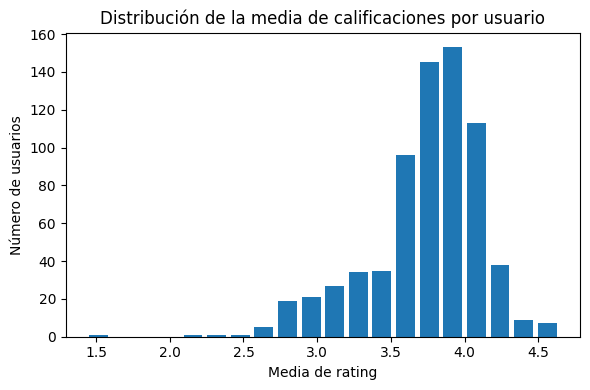


Top 10 cervezas con mayor media de rating:


,beerId,mean_rating,beerName
3393,56082,4.669492,Citra DIPA
640,1545,4.666129,Trappist Westvleteren 12
2525,36316,4.654762,Cantillon Blåbær Lambik
473,1062,4.639706,Live Oak HefeWeizen
1809,16814,4.639344,Heady Topper
2839,42664,4.625000,Kaggen! Stormaktsporter
3618,64545,4.620000,Double Sunshine IPA
3543,61100,4.615385,King Henry
1980,21690,4.605634,Pliny The Younger
3075,47658,4.601695,Founders CBS Imperial Stout


Top 10 cervezas con menor media de rating:


,beerId,mean_rating,beerName
855,2213,1.376923,Crazy Ed's Cave Creek Chili Beer
2641,38763,1.564516,Original C Cave Creek Chili Beer - Cerveza Con...
2123,26049,1.818182,Wild Blue (Blueberry Lager)
2585,37389,1.828571,Budweiser Chelada
3262,52480,1.919355,Budweiser Select 55
1712,13770,1.928571,Rock Green Light
519,1183,1.976190,Tequiza
1926,20638,1.984848,Bud Extra
126,233,1.993827,Corona Light
2588,37424,2.000000,Bud Light Chelada


Resumen estadístico de la media por producto:
count    3747.000000
mean        3.786074
std         0.359536
min         1.376923
25%         3.633740
50%         3.838710
75%         4.021680
max         4.669492
Name: mean_rating, dtype: float64


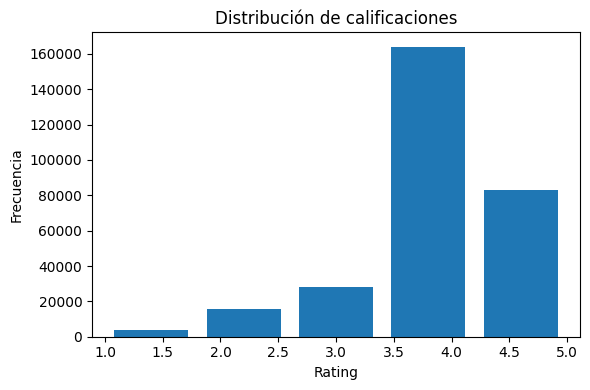


Matriz Usuario–Producto (primeras filas):


beerId,5,6,7,9,10,11,14,15,17,19,...,74491,74530,74548,74579,74634,74827,74904,74986,75013,75086
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.395,3.765217,3.256849,3.478261,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,3.791908,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,3.431818,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,3.892157,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
#1
from IPython.display import display
from google.colab import data_table

data_table.enable_dataframe_formatter()

overall_mean = df_1['rating'].mean()
print(f"Media global de calificaciones: {overall_mean:.2f}")

user_mean = (
    df_1
    .groupby('userId')['rating']
    .mean()
    .reset_index(name='mean_rating')
)

print("\nMedia de calificaciones por usuario (primeros 10):")
display(user_mean.head(10))

print("Resumen estadístico de la media por usuario:")
print(user_mean['mean_rating'].describe())

plt.figure(figsize=(6,4))
plt.hist(user_mean['mean_rating'], bins=20, rwidth=0.8)
plt.title('Distribución de la media de calificaciones por usuario')
plt.xlabel('Media de rating')
plt.ylabel('Número de usuarios')
plt.tight_layout()
plt.show()

product_mean = (
    df_1
    .groupby('beerId')['rating']
    .mean()
    .reset_index(name='mean_rating')
    .merge(
        df_1[['beerId','beerName']].drop_duplicates(),
        on='beerId',
        how='left'
    )
)

print("\nTop 10 cervezas con mayor media de rating:")
display(product_mean.sort_values('mean_rating', ascending=False).head(10))

print("Top 10 cervezas con menor media de rating:")
display(product_mean.sort_values('mean_rating', ascending=True).head(10))

print("Resumen estadístico de la media por producto:")
print(product_mean['mean_rating'].describe())

plt.figure(figsize=(6,4))
plt.hist(df_1['rating'].dropna(), bins=5, rwidth=0.8)
plt.title('Distribución de calificaciones')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

user_item = df_1.pivot_table(
    index='userId',
    columns='beerId',
    values='rating'
)

print("\nMatriz Usuario–Producto (primeras filas):")
display(user_item.head())



En base a los productos, se ve que entre mas rating mas frecuencia lo cual hace sentido

## 2.2 Método Basado en Contenido [4 puntos]

<center>
<img src ="https://is1-ssl.mzstatic.com/image/thumb/WfNa_TwFpJoTWXQmU-BrbA/1200x675.jpg" width = 500 />

Como primera tarea, Homero le pide centrarse en las características de las cervezas y no en la interacción de los ciudadanos con esta. Adicionalmente, Homero le quiere regalar un pack de distintas cervezas a Carl en agradecimiento a su ayuda anterior, el cual se enteró que Carl tiene un `userId = 100`. Por ende, Homero le pide las siguientes acciones:

1. Cree un dataframe que contenga las características de las cervezas, excluyendo las evaluaciones de los ciudadanos. `Nota:` No considere valores duplicados. [1 punto]
2. Implemente el método Bag of Words para procesar la columna `beerStyle`. Para ello, transforme las palabras a minúsculas, elimine stopwords en inglés y filtre las palabras que aparezcan en 10 documentos como mínimo. Guarde su resultado como un DataFrame. [1 punto].
> `Nota:` Le puede ser útil esta [documentacion](https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) y el método `.get_feature_names_out()`.
3. Cree una función que imprima las top 5 cervezas similares a `Chocolate Porter`, utilizando como medida de similitud la similitud coseno. [1 punto]
4. Identifique la cerveza mejor evaluada por Carl (`userId = 100`) y obtenga las top 5 cervezas similares a esa cerveza. [1 punto]

**Respuesta:**

In [40]:
#CODIGO AQUI
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#1
df_beers = df_1[['beerId','beerName','beerStyle']].drop_duplicates().reset_index(drop=True)

#2
vectorizer = CountVectorizer(
    lowercase=True,
    stop_words='english',
    min_df=10
)
style_matrix = vectorizer.fit_transform(df_beers['beerStyle'])
bow_df = pd.DataFrame(
    style_matrix.toarray(),
    index=df_beers['beerName'],
    columns=vectorizer.get_feature_names_out()
)

#3
cos_sim = cosine_similarity(bow_df)
sim_df = pd.DataFrame(cos_sim, index=bow_df.index, columns=bow_df.index)


def print_similar(beer_name, top_n=5):
    sims = sim_df.loc[:, beer_name]
    if isinstance(sims, pd.DataFrame):
        sims = sims.iloc[:, 0]
    sims = sims.drop(labels=beer_name)
    top_sim = sims.sort_values(ascending=False).head(top_n)

    print(f"Top {top_n} cervezas similares a '{beer_name}':")
    for name, score in top_sim.items():
        print(f"  {name} ({score:.3f})")

#ej
print_similar("Chocolate Porter", top_n=5)

# --- 4) Mejor cerveza valorada por Carl (userId=100) y sus similares ---
user100 = df_1[df_1['userId'] == 100]
best_rating = user100['rating'].max()
best_beers = user100[user100['rating'] == best_rating]['beerName'].unique()
best_beer = best_beers[0]
print(f"Mejor cerveza valorada por Carl: '{best_beer}' (rating={best_rating})")
print_similar(best_beer, top_n=5)


Top 5 cervezas similares a 'Chocolate Porter':
  Terrapin Dos Cocoas Chocolate Porter (1.000)
  Moor Porter (1.000)
  Duck-Rabbit Porter (1.000)
  Great Lakes Edmund Fitzgerald Porter (1.000)
  Bell's Porter (1.000)
Mejor cerveza valorada por Carl: 'McNeill's Extra Special Bitter' (rating=4.5)
Top 5 cervezas similares a 'McNeill's Extra Special Bitter':
  Adnams SSB (Suffolk Special Bitter) (1.000)
  Thames Welsh ESB (1.000)
  Adnams Broadside (1.000)
  Bachelor ESB (1.000)
  Great Lakes Moondog ESB (1.000)


## 2.3 Filtros Colaborativos [16 puntos]

<center>
<img src ="https://i.makeagif.com/media/2-08-2016/McmGFQ.gif" width = 400 />

Después de consolidarse como el Barón de la Cerveza en Springfield, Homero Simpson decidió llevar su negocio clandestino a otro nivel. Al ser el único proveedor de alcohol en la ciudad, quiere asegurarse de que cada cerveza que elabora sea de la mejor calidad posible. Para lograrlo, planea usar las evaluaciones pasadas que los ciudadanos de Springfield han registrado sobre las distintas cervezas. Inspirado por los consejos de su amigo Moe, Homero se enteró de que puede implementar un sistema de recomendación basado en filtros colaborativos.

Ahora, Homero necesita de su ayuda para diseñar y elaborar distintos sistemas de filtros colaborativos que le permitan continuar con su reinado cervecero.

### 2.3.1 Filtros Colaborativos Basados en Memoria [8 puntos]

Para este tipo de filtros, Homero le pide lo siguiente:

1. Transforme el DataFrame de `pandas` a Dataset de `surprise`. `Hint`: Utilice solamente los identificadores de ciudadano, cerveza y rating. ¿Importa el orden? [1 punto]
2. Genere un conjunto de entrenamiento y uno de prueba, asegurando que el 30% de los datos sea destinado al conjunto de prueba. No olvide fijar una semilla para garantizar reproducibilidad. [1 punto]
3. Entrene un modelo de **KNN basado en usuarios** utilizando la `similitud coseno`. Luego realice predicciones en el conjunto de prueba. `Nota`: Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/knn_inspired.html) [2 puntos]
4. Calcule el MAE (Mean Absolute Error) de las predicciones realizadas por el modelo y muestre las predicciones en un DataFrame para su análisis. `Nota:` Le puede ser útil la siguiente [documentación](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.mae) [2 puntos]
5. Repita los pasos 3 y 4 pero utilizando un modelo de **KNN basado en los productos**. [2 puntos]

**Respuesta:**

In [41]:
#CODIGO AQUI
#1
from surprise import Dataset, Reader
rating_min = df_1['rating'].min()
rating_max = df_1['rating'].max()
reader = Reader(rating_scale=(rating_min, rating_max))

ratings_df = df_1[['userId', 'beerId', 'rating']]
data = Dataset.load_from_df(ratings_df, reader)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.3.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

ImportError: numpy.core.multiarray failed to import (auto-generated because you didn't call 'numpy.import_array()' after cimporting numpy; use '<void>numpy._import_array' to disable if you are certain you don't need it).

No importa el orden de las filas De las filas porque surprise no lo requiere ya que internamente los baraja o divide según folds.

### 2.3.2 Filtros Colaborativos Basados en Modelo [8 puntos]

Ahora Homero le pide que cambie el enfoque del tipo de filtro colaborativo a uno basado en modelo. Por ende, Homero le pide lo siguiente:

1. Entrene un modelo `NMF` , asegurándose de fijar la semilla para reproducibilidad. Luego genere predicciones para el conjunto de prueba. [2 puntos]
2. Calcule el MAE de las predicciones obtenidas y muestre los resultados de las predicciones en un DataFrame para su analisis. [1 punto]
3. Entrene un modelo `SVD` sobre el conjunto de entrenamiento. Posteriormente, genere las predicciones para el conjunto de prueba. [2 puntos]
4. Calcule el MAE de las predicciones y muestre los resultados de las predicciones en un DataFrame. [1 punto]
5. Compare los resultados de ambos modelos y seleccione el mejor a su criterio. Justifique. [2 puntos]

**Respuesta**

In [ ]:
#CODIGO AQUI

## 2.4 El Mejor Filtro Colaborativo [7 puntos]

<center>
<img src ="https://media.giphy.com/media/citBl9yPwnUOs/giphy.gif" width = 400 />

Homero Simpson desea perfeccionar y extender su sistema de recomendaciones para cervezas en Springfield. En esta fase, busca implementar técnicas que le permitan no solo predecir las preferencias de los ciudadanos, sino también evaluar métricas que midan la eficacia de sus recomendaciones. Con el objetivo de recomendar las mejores K cervezas para usuarios específicos, Homero buscará comprender mejor cómo optimizar su sistema y satisfacer a sus clientes.

Para ello, usted ayudará a Homero realizando las siguientes labores:

1. Implemente la función `get_top_n()` que le permita extraer las `N` mejores cervezas recomendadas para cada ciudadano utilizando las predicciones generadas por el mejor modelo seleccionado en la sección anterior. Luego obtenga las `3` mejores cervezas recomendadas para Carl (`userId = 100`). `Hint`: Para cada ciudadano, elimine las predicciones duplicadas. [2 puntos]
2. Realice predicciones de rating para 5 cervezas aleatorias no evaluadas por Carl, para estimar las calificaciones que Carl podría darles. [1 punto]
3. Calcule los promedios de `precisión@k` y el `recall@k` para `k=10` y `threshold = 3.5`. Analice sus resultados. ¿Es un buen modelo? `Hint:` Utilice la función dada `precision_recall_at_k(...)`. [1 punto]
4. Calcule la `precisión@k` y el `recall@k` para valores de `k` que varíen entre 3 y 25 con paso de 1 unidad. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `k`. [1 punto]
5. Calcule la `precisión@k` y el `recall@k` para valores de `threshold` que varíen entre 3.0 y 4.5, con paso de 0.1. Luego, grafique los resultados y analice el comportamiento de las curvas de precisión y recall en función de `threshold`. [1 punto]
6. Finalmente utilice el mejor modelo para estimar los ratings faltantes. Muestre sus resultados en una matriz (usuario, producto) sin valores nulos. [1 punto]



In [ ]:
#NO MODIFICAR ESTA CELDA
def precision_recall_at_k(predictions, k=10, threshold=3.5):

    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(
            ((true_r >= threshold) and (est >= threshold))
            for (est, true_r) in user_ratings[:k]
        )
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    return precisions, recalls

**Respuesta:**

In [ ]:
#Desarrolle su código aquí

# Conclusión

Éxito!
<center>
<img src ="https://i.gifer.com/origin/cb/cbd80e6045652ab123caffef72f29210_w200.gif" width = 400 />
